## About the dataset

As a way of evaluating the feasibility of using AI models to detect peaks in gamma spectra, I developed an algorithm to simulate, in a simplified way, spectra acquired by a spectrometry system within several different scenarios. The advantage of the simulated spectra is the possibility of studying specific cases that would be impossible without taking over a HPGe detector for long periods of time. The auxiliary functions for spectrum generation can be found in `/helpers/spectrum_generator.py`.

In [11]:
import sys
sys.path.append('../')
from helpers import spectrum_generator
import gzip
import pickle
import matplotlib.pyplot as plt

In [ ]:
X,y,dummy = spectrum_generator.simulated_spectra(iter=1000,
                                                 bg_range=(40,81),
                                                 snr_db_range=(1,4),
                                                 include_dummy=True)
pickle.dump((X,y,dummy), gzip.open('../data/artificial.pickle', 'wb'))

The counts of a simulated peak are distributed in a Gaussian manner around the chosen channel for the peak centroid. Although the peaks of gamma spectra have a low-energy tail, the Gaussian function is a reasonable approximation. 

## Artificial spectra, real problem

In real gamma-ray spectrometry, the continuum is a byproduct of the backscattering effect of higher energy gamma emissions, and its intensity is proportional to the rate of gamma emissions of different energies observed by the detector. Thus, samples containing different concentrations of radionuclides and natural interferents (that may or may not vary according to seasons) will affect the height of the spectrum continuum.

The simulated spectra in this experiment tries mimick a real scenario. The algorithm generated a background of variable height from spectrum to spectrum. The average background count per channel varied uniformly across the spectrum (between 40 and 80 counts). 1000 spectra were generated so that, randomly, 50% had peaks with SNR (signal-to-noise ratio) varying between 1 and 3 dB, which is a pretty small value for a gamma-ray peak, since it's barely distinguishable from the background continuum. This is a very common situation with regard to analysis of environmental nuclides.


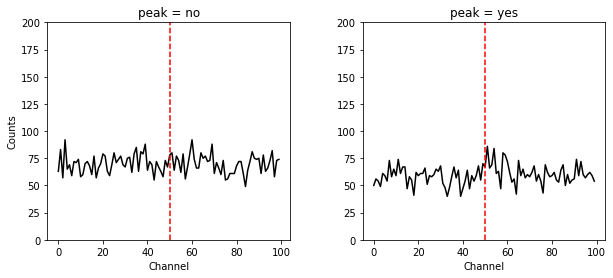

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(X[0], color='black')
plt.ylim(0,200)
plt.axvline(50, linestyle='--', color='red')
plt.title('peak = no')
plt.ylabel('Counts')
plt.xlabel('Channel')

plt.subplot(1,2,2)
plt.plot(X[4], color='black')
plt.axvline(50, linestyle='--', color='red')
plt.ylim(0,200)
plt.title('peak = yes')
plt.xlabel('Channel')

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

Can you identify the peak in this spectrum? Yep, me neither.

Furthermore, spurious peaks were added to 5% of the spectra, simulating the presence of unexpected radionuclides in the samples. These had random values between 100 and 200 counts, although they did not overlap the peak of classification interest. An example is shown below.  So yeah, lots of fun to our machine learning model! :)